# SVC on non linear overlapped dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pxp

In [3]:
x = np.linspace(-5.0,5,100)
y = np.sqrt(100 - x**2)
x = np.hstack([x,-x])
y = np.hstack([y,-y])

In [4]:
x1 = np.linspace(-5.0,5,100)
y1 = np.sqrt(5**2 - x1**2)
x1 = np.hstack([x1,-x1])
y1 = np.hstack([y1,-y1])

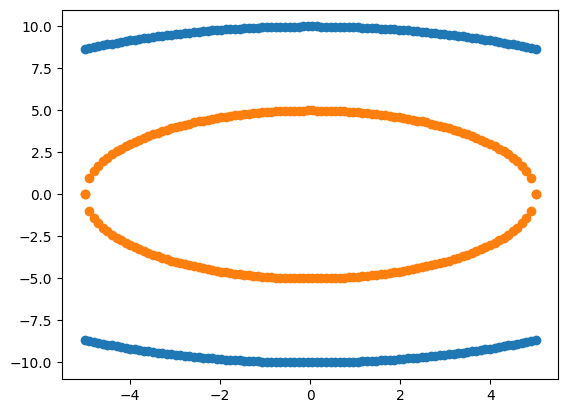

In [5]:
plt.scatter(x,y)
plt.scatter(x1,y1)

In [9]:
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1,df2],axis=0)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [10]:
df.tail()

,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


In [11]:
pxp.scatter_3d(data_frame=df, x = 'X1', y = 'X2', z = 'Y')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'X1=%{x}<br>X2=%{y}<br>Y=%{z}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('6y830QxSIUBFUglwgm8hQOSR0jEujC' ... 'LdsYL2v/sYuQKV/++/AAAAAAAAAIA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAAAAFMBDYt7OkJgTwIbEvJ0hMR' ... 'ydITETwERi3s6QmBPAAAAAAAAAFMA='),
                    'dtype': 'f8'},
              'z': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'EBAQEBAQEBAQEBAQEBAQEBAQEBAQ=='),
                    'dtype': 'i1'}}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'X1'}},
                         'yaxis': {'title': {'text': 'X2'}},
                         'zaxis': {'title': {'text': 'Y'}}},
               'template': '...'}
})

In [13]:
### Dependent and independent features:
X= df.iloc[:,-1]
y = df.Y

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [15]:
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [16]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [18]:
pxp.scatter_3d(data_frame=df, x = 'X1_Square',y = 'X2_Square',z = 'X1*X2')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'X1_Square=%{x}<br>X2_Square=%{y}<br>X1*X2=%{z}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('AQAAAADAUkDQrw1U/v9SQBS6zFKuPl' ... '6zlKv/P8Dn1wYq/+8/AAAAAAAAAAA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAAAAOUDAQMmvBgA4QLAXzbRGBT' ... '20RgU3QMJAya8GADhAAAAAAAAAOUA='),
                    'dtype': 'f8'},
              'z': {'bdata': ('5vuEBZCmRcA8YDcJrFpFwNB0wAZZDE' ... 'vDUgAbQOsQZUpPmBNAAAAAAAAAAAA='),
                    'dtype': 'f8'}}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'X1_Square'}},
                         'yaxis': {'title': {'text': 'X2_Square'}},
                         'zaxis': {'title': {'text': 'X1*X2'}}},
               'template': '...'}
})

In [19]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
def kernal_selection(kernal):
    svc = SVC(kernel = kernal)
    svc.fit(X_train,y_train)
    pred_svc = svc.predict(X_test)
    print("Accuracy Score: ", accuracy_score(y_test, pred_svc))
    print("Classification Report: \n", classification_report(y_test,pred_svc))

In [23]:
kernal_selection("linear")

Accuracy Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [24]:
kernal_selection("poly")

Accuracy Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [25]:
kernal_selection("rbf")

Accuracy Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [26]:
kernal_selection("sigmoid")

Accuracy Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

